In [70]:
import pandas as pd
import numpy as np
import io
import csv
import re
from datetime import datetime

In [71]:
name = 'dadosImoveisPrefeituraAlegrete'
filename = name+'.csv'

In [72]:
localizacao = []
descricao = []
dataDeAquisicao = []
departamento = []
observacoes = []
nmrPorSetor = 0
with io.open(filename,'r',encoding='utf8',errors="ignore",newline='') as f:
    reader = csv.reader(f)

    i = 0
    for row in reader:
        #Cada linha virava uma lista				
        #transformo todos elementos dessa lista numa string unica
        str1 = ''.join(row)
        #crio uma lista com elementos que vao ate ;,  
        list = str1.split(';')
        #no csv temos dois tipos de elementos com apenas um indice
        if len(list)==1:

            #os que contem apenas o nome do bairro
            if "na divis" not in list[0]:
                local = list[0]

            #E os que contem informacoes sobre a quantidade de terrenos naquele bairro, setor ou etc
            else:
                nmrPorSetor = int(list[0].split(' ', 1)[0])
                for x in range(0,nmrPorSetor):
                    localizacao.append(local)

        #para os elementos que tem 4, sabemos que eles contem informacoes sobre o terreno em si
        if len(list)>1:
            try:
                descricao.append(list[0])
                data = str(list[1])
                try:
                    dataDeAquisicao.append(datetime.strptime(data,"%d/%m/%Y"))
                except Exception as e:
                    print (data)
                    print ("Erro ao converter uma data: ",e)
                departamento.append(list[2])
                observacoes.append(list[3])
            except Exception as e:
                print ("\nError.: "+str(e))
        i+=1

In [73]:
df = pd.DataFrame({'localizacao':localizacao,
                   'descricao':descricao,
                   'dataDeAquisicao':dataDeAquisicao,
                   'departamento':departamento,
                   'observacoes':observacoes})


In [74]:
def criaData(dataDesejada):
    try:
        data = datetime.strptime(dataDesejada,"%d/%m/%Y")
        return data
    except Exception as e:
        print (" Data invalida: "+str(e))

In [10]:
def calculaQuantosMenorQueData(df,dataDesejada):

    count = 0

    for d in df['dataDeAquisicao']:

        if d<dataDesejada:
            count+=1

    return count

In [12]:
def calculaQuantosMaiorQueData(df,dataDesejada):

    count = 0

    for d in df['dataDeAquisicao']:
    
        try:
            if d>dataDesejada:
                count+=1
        except Exception as e:
            pass
            
    return count

In [13]:
def imoveisPorMandato(df,dataInicio,dataFim):

        count = 0

        for d in df['dataDeAquisicao']:
        
            try:
                if d>=dataInicio and d<=dataFim:
                    count+=1
            except Exception as e:
                pass

        return count

In [14]:
def containsObs(df,stg):
        try:
            count = df['observacoes'].str.contains(stg,regex=False).value_counts()
            return count
        except Exception as e:
            print("Nao foi possivel calcular quantos imoveis contem em sua observacao a string "+stg+" :(") 

#quantidade de imoveis adquiridos por mandato

In [15]:
#quantidade de imoveis adquiridos por mandato
imoveisPorMandato(df,criaData("1/1/1968"),criaData("31/12/1972")) 

0

In [16]:
#quantidade de imoveis adquiridos por mandato
imoveisPorMandato(df,criaData("1/1/1973"),criaData("31/12/1976"))

1

In [17]:
#quantidade de imoveis adquiridos por mandato
imoveisPorMandato(df,criaData("1/1/1977"),criaData("31/12/1982"))

4

In [18]:
#quantidade de imoveis adquiridos por mandato
imoveisPorMandato(df,criaData("1/1/1983"),criaData("31/12/1988"))

5

In [19]:
#quantidade de imoveis adquiridos por mandato
imoveisPorMandato(df,criaData("1/1/1989"),criaData("31/12/1992"))

3

In [20]:
#quantidade de imoveis adquiridos por mandato
imoveisPorMandato(df,criaData("1/1/1993"),criaData("31/12/1996"))

0

In [21]:
#quantidade de imoveis adquiridos por mandato
imoveisPorMandato(df,criaData("1/1/1997"),criaData("31/12/2000"))

5

In [22]:
#quantidade de imoveis adquiridos por mandato
imoveisPorMandato(df,criaData("1/1/2001"),criaData("31/12/2004"))

11

In [23]:
#quantidade de imoveis adquiridos por mandato
imoveisPorMandato(df,criaData("1/1/2005"),criaData("31/12/2007"))

19

In [24]:
#quantidade de imoveis adquiridos por mandato
imoveisPorMandato(df,criaData("1/1/2008"),criaData("31/12/2011"))

4

In [25]:
#quantidade de imoveis adquiridos por mandato
imoveisPorMandato(df,criaData("1/1/2012"),criaData("31/12/2016"))

2

In [26]:
#quantidade de imoveis adquiridos por mandato
imoveisPorMandato(df,criaData("1/1/2016"),criaData("31/12/2018"))

0

In [27]:
df

,dataDeAquisicao,departamento,descricao,localizacao,observacoes
0,2007-01-05 00:00:00,CADASTRO DE IMVEIS URBANOS-PATRIMNIO,TERRENO MATRCULA 24575,REA DO ANTIGO AEROPORTO,Uma faixa de terreno situado zona leste no bai...
1,2007-01-05 00:00:00,CADASTRO DE IMVEIS URBANOS-PATRIMNIO,TERRENO MATRCULA 25468,REA DO ANTIGO AEROPORTO,Um terreno situado zona leste no bairro projet...
2,2007-01-05 00:00:00,CADASTRO DE IMVEIS URBANOS-PATRIMNIO,TERRENO MATRCULA 25469,REA DO ANTIGO AEROPORTO,Um terreno situado zona leste no bairro projet...
3,2007-01-05 00:00:00,CADASTRO DE IMVEIS URBANOS-PATRIMNIO,TERRENO MATRCULA 25470,REA DO ANTIGO AEROPORTO,Um terreno situado zona leste no bairro projet...
4,2007-01-05 00:00:00,CADASTRO DE IMVEIS URBANOS-PATRIMNIO,TERRENO MATRCULA 25471,REA DO ANTIGO AEROPORTO,Um terreno situado zona leste no bairro projet...
5,2007-01-25 00:00:00,CADASTRO DE IMVEIS URBANOS-PATRIMNIO,TERRENO MATRCULA 25472,REA DO ANTIGO AEROPORTO,Um terreno situado zona leste no bairro projet...
6,2007-01-05 00:00:00,CADASTRO DE IMVEIS URBANOS-PATRIMNIO,TERRENO MATRCULA 25473,REA DO ANTIGO AEROPORTO,Um terreno situado zona leste bifurcao formada...
7,2007-01-05 00:00:00,CADASTRO DE IMVEIS URBANOS-PATRIMNIO,TERRENO MATRCULA 25474,REA DO ANTIGO AEROPORTO,Um terreno situado zona leste no bairro projet...
8,2007-01-05 00:00:00,CADASTRO DE IMVEIS URBANOS-PATRIMNIO,TERRENO MATRCULA 25476,REA DO ANTIGO AEROPORTO,Uma faixa de terreno situado zona leste no bai...
9,2007-01-05 00:00:00,CADASTRO DE IMVEIS URBANOS-PATRIMNIO,TERRENO MATRCULA 25477,REA DO ANTIGO AEROPORTO,Uma faixa de terreno situado zona leste no bai...


In [30]:
#todos os imoveis localizados na REA DO ANTIGO AEROPORTO
c = df[df.localizacao == 'REA DO ANTIGO AEROPORTO']
c

,dataDeAquisicao,departamento,descricao,localizacao,observacoes
0,2007-01-05 00:00:00,CADASTRO DE IMVEIS URBANOS-PATRIMNIO,TERRENO MATRCULA 24575,REA DO ANTIGO AEROPORTO,Uma faixa de terreno situado zona leste no bai...
1,2007-01-05 00:00:00,CADASTRO DE IMVEIS URBANOS-PATRIMNIO,TERRENO MATRCULA 25468,REA DO ANTIGO AEROPORTO,Um terreno situado zona leste no bairro projet...
2,2007-01-05 00:00:00,CADASTRO DE IMVEIS URBANOS-PATRIMNIO,TERRENO MATRCULA 25469,REA DO ANTIGO AEROPORTO,Um terreno situado zona leste no bairro projet...
3,2007-01-05 00:00:00,CADASTRO DE IMVEIS URBANOS-PATRIMNIO,TERRENO MATRCULA 25470,REA DO ANTIGO AEROPORTO,Um terreno situado zona leste no bairro projet...
4,2007-01-05 00:00:00,CADASTRO DE IMVEIS URBANOS-PATRIMNIO,TERRENO MATRCULA 25471,REA DO ANTIGO AEROPORTO,Um terreno situado zona leste no bairro projet...
5,2007-01-25 00:00:00,CADASTRO DE IMVEIS URBANOS-PATRIMNIO,TERRENO MATRCULA 25472,REA DO ANTIGO AEROPORTO,Um terreno situado zona leste no bairro projet...
6,2007-01-05 00:00:00,CADASTRO DE IMVEIS URBANOS-PATRIMNIO,TERRENO MATRCULA 25473,REA DO ANTIGO AEROPORTO,Um terreno situado zona leste bifurcao formada...
7,2007-01-05 00:00:00,CADASTRO DE IMVEIS URBANOS-PATRIMNIO,TERRENO MATRCULA 25474,REA DO ANTIGO AEROPORTO,Um terreno situado zona leste no bairro projet...
8,2007-01-05 00:00:00,CADASTRO DE IMVEIS URBANOS-PATRIMNIO,TERRENO MATRCULA 25476,REA DO ANTIGO AEROPORTO,Uma faixa de terreno situado zona leste no bai...
9,2007-01-05 00:00:00,CADASTRO DE IMVEIS URBANOS-PATRIMNIO,TERRENO MATRCULA 25477,REA DO ANTIGO AEROPORTO,Uma faixa de terreno situado zona leste no bai...


In [36]:
#quantos imoveis há por localizacao?
df["localizacao"].value_counts()

SETOR N15                            19
SETOR N 11                           17
BAIRRO MEDIANEIRA                    16
SETOR N 1                            15
ESCOLAS URBANAS                      15
SETOR N 14                           12
SETOR N4                             12
SETOR N 9                            12
SETOR N3                             11
DURASNAL-3 SUBDISTRITO               11
REA DO ANTIGO AEROPORTO              10
SETOR N5                             10
SETOR N  10                           8
GUASSU-BOI-7 SUBDISTRITO              8
VASCO ALVES-4 SUBDISTRITO             7
SETOR N 24-  2DISTRITO-PASSO NOVO     5
PASSO NOVO-2 DISTRITO                 5
SETOR N 2                             4
CATIMBAU-6 SUBDISTRITO                4
INHANDU-5 SUBDISTRITO                 4
SETOR N 12                            4
SETOR N 8                             4
ITAPOROR-2SUBDISTRITO                 4
RINC DE SO MIGUEL-8 SUBDISTRITO       3
SETOR N 23- 8SUBDISTRITO              3


In [37]:
#quantos imoveis há por departamento(urbanos e rurais)?
df['departamento'].value_counts()

CADASTRO DE IMVEIS URBANOS-PATRIMNIO    183
CADASTRO IMVEIS RURAIS                   64
Name: departamento, dtype: int64

In [38]:
#Quantos imoveis foram adquiridos antes do ano 1/1/1999?
calculaQuantosMenorQueData(df,datetime.strptime("1/1/1111","%d/%m/%Y")) 

1

In [39]:
#Quantos imoveis foram adquiridos depois do ano 1/1/1999?
calculaQuantosMaiorQueData(df,criaData("1/1/1999")) 

41

In [43]:
#quantos imoveis estao na zona leste e quantos não são?
containsObs(df,"zona leste")

False    237
True      10
Name: observacoes, dtype: int64

In [45]:
#quantos imoveis no bairro capao do angico
df.localizacao[df.localizacao == "CAPO DO ANGICO"].count()

1

In [46]:
#quantos imoveis há por localizacao?
df["dataDeAquisicao"].value_counts()

1111-11-11 00:00:00    192
2007-01-05 00:00:00      9
2004-02-27 00:00:00      6
1999-06-25 00:00:00      5
2001-09-05 00:00:00      3
2007-11-16 00:00:00      2
2011-09-08 00:00:00      2
1976-12-09 00:00:00      1
1988-04-05 00:00:00      1
1992-05-05 00:00:00      1
2009-01-01 00:00:00      1
2015-01-01 00:00:00      1
2007-09-12 00:00:00      1
1984-12-03 00:00:00      1
1980-01-28 00:00:00      1
1984-03-15 00:00:00      1
2007-02-15 00:00:00      1
1990-04-26 00:00:00      1
2003-11-13 00:00:00      1
1979-03-27 00:00:00      1
2005-09-08 00:00:00      1
2008-01-24 00:00:00      1
2007-05-15 00:00:00      1
2006-11-23 00:00:00      1
1985-12-31 00:00:00      1
2007-10-19 00:00:00      1
1982-01-27 00:00:00      1
2013-05-21 00:00:00      1
2001-06-05 00:00:00      1
2007-04-11 00:00:00      1
1985-07-29 00:00:00      1
0206-10-06 00:00:00      1
2007-01-25 00:00:00      1
1978-11-14 00:00:00      1
1990-06-20 00:00:00      1
Name: dataDeAquisicao, dtype: int64

CADASTRO DE IMVEIS URBANOS-PATRIMNIO    183
CADASTRO IMVEIS RURAIS                   64
Name: departamento, dtype: int64

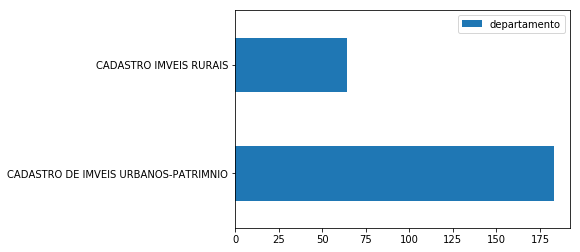

In [100]:
#Rural x Urbano
a = pd.DataFrame(df['departamento'].value_counts())
a
a.plot.barh()
df['departamento'].value_counts()

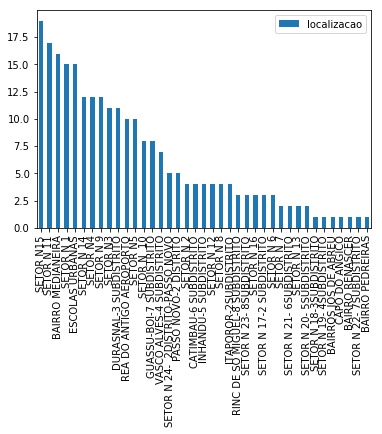

In [114]:
a = pd.DataFrame(df["localizacao"].value_counts())
a
a.plot.bar()

1111-11-11 00:00:00    192
2007-01-05 00:00:00      9
2004-02-27 00:00:00      6
1999-06-25 00:00:00      5
2001-09-05 00:00:00      3
2007-11-16 00:00:00      2
2011-09-08 00:00:00      2
1976-12-09 00:00:00      1
1988-04-05 00:00:00      1
1992-05-05 00:00:00      1
2009-01-01 00:00:00      1
2015-01-01 00:00:00      1
2007-09-12 00:00:00      1
1984-12-03 00:00:00      1
1980-01-28 00:00:00      1
1984-03-15 00:00:00      1
2007-02-15 00:00:00      1
1990-04-26 00:00:00      1
2003-11-13 00:00:00      1
1979-03-27 00:00:00      1
2005-09-08 00:00:00      1
2008-01-24 00:00:00      1
2007-05-15 00:00:00      1
2006-11-23 00:00:00      1
1985-12-31 00:00:00      1
2007-10-19 00:00:00      1
1982-01-27 00:00:00      1
2013-05-21 00:00:00      1
2001-06-05 00:00:00      1
2007-04-11 00:00:00      1
1985-07-29 00:00:00      1
0206-10-06 00:00:00      1
2007-01-25 00:00:00      1
1978-11-14 00:00:00      1
1990-06-20 00:00:00      1
Name: dataDeAquisicao, dtype: int64

In [115]:
print (imoveisPorMandato(df,criaData("1/1/1968"),criaData("31/12/1972")))
print (imoveisPorMandato(df,criaData("1/1/1973"),criaData("31/12/1976")))
print (imoveisPorMandato(df,criaData("1/1/1977"),criaData("31/12/1982")))
print (imoveisPorMandato(df,criaData("1/1/1983"),criaData("31/12/1988")))
print (imoveisPorMandato(df,criaData("1/1/1989"),criaData("31/12/1992")))
print (imoveisPorMandato(df,criaData("1/1/1993"),criaData("31/12/1996")))
print (imoveisPorMandato(df,criaData("1/1/1997"),criaData("31/12/2000")))
print (imoveisPorMandato(df,criaData("1/1/2001"),criaData("31/12/2004")))
print (imoveisPorMandato(df,criaData("1/1/2005"),criaData("31/12/2007")))
print (imoveisPorMandato(df,criaData("1/1/2008"),criaData("31/12/2011")))
print (imoveisPorMandato(df,criaData("1/1/2012"),criaData("31/12/2016")))
print (imoveisPorMandato(df,criaData("1/1/2016"),criaData("31/12/2018")))


0
1
4
5
3
0
5
11
19
4
2
0


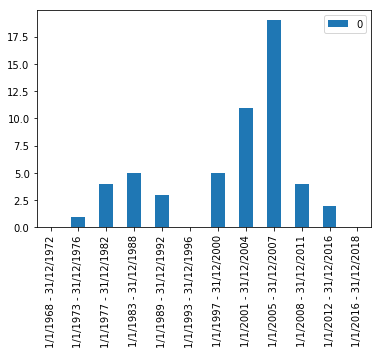

In [119]:
s = [0,1,4,5,3,0,5,11,19,4,2,0]
a = pd.DataFrame(s,index=['1/1/1968 - 31/12/1972', '1/1/1973 - 31/12/1976', '1/1/1977 - 31/12/1982', '1/1/1983 - 31/12/1988'
                          , '1/1/1989 - 31/12/1992', '1/1/1993 - 31/12/1996','1/1/1997 - 31/12/2000','1/1/2001 - 31/12/2004',
                          '1/1/2005 - 31/12/2007','1/1/2008 - 31/12/2011','1/1/2012 - 31/12/2016','1/1/2016 - 31/12/2018'])
a
a.plot.bar()